#  Laboratorio 7
# Predicción de Diabetes con AutoGluom
- Javier Prado 21496
- Luis Pedro Monterroso 21699

# Carga del conjunto de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [2]:
data = pd.read_csv('diabetes.csv')
df = pd.DataFrame(data)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()
print(df.shape)
print(df.dtypes.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
(768, 9)
int64      7
float64    2
Name: count, dtype: int64


In [4]:
# duplicated values
print("Duplicados:", df.duplicated().sum())

Duplicados: 0


In [5]:
# revisión y descripción de los datos
print(df.describe().T)
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Columnas numéricas:", num_cols)
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("Columnas categóricas:", cat_cols)

                          count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinT

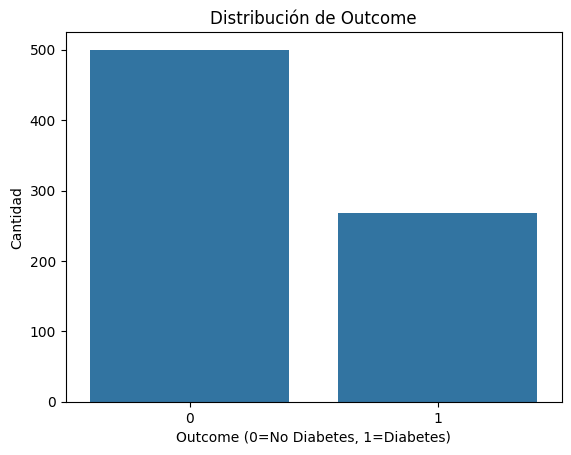

In [7]:
# grafico outcomne
if "Outcome" in df.columns:
    sns.countplot(x="Outcome", data=df)
    plt.title("Distribución de Outcome")
    plt.xlabel("Outcome (0=No Diabetes, 1=Diabetes)")
    plt.ylabel("Cantidad")
    plt.show()

# Explicacion concepto Outcome
Outcome es la etiqueta binaria del conjunto de datos: indica si la persona presenta diabetes (1) o no presenta diabetes (0) de acuerdo con el criterio clínico usado para construir el dataset (p. ej., diagnóstico basado en pruebas de glucosa como la prueba de tolerancia oral; típicamente, valores elevados y/o criterios establecidos por guías clínicas). Esta columna es el objetivo (target) que intentaremos predecir a partir de los demás predictores (glucosa, presión diastólica, IMC, insulina, edad, etc.).


# 2. Análisis Exploratorio de Datos (EDA):
Obtenga estadísticas descriptivas básicas del conjunto de datos.

In [9]:
# Estadísticas descriptivas completas
print("=== INFORMACIÓN BÁSICA DEL DATASET ===")
print(f"Forma del dataset: {df.shape}")
print(f"Columnas: {list(df.columns)}")
print(f"Tipos de datos:")
print(df.dtypes)
print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
print(df.describe().round(2))

# Información adicional
print("\n=== INFORMACIÓN ADICIONAL ===")
print("Valores únicos por columna:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")
    
print(f"\nDuplicados: {df.duplicated().sum()}")
print(f"Memoria total utilizada: {df.memory_usage(deep=True).sum()/1024:.2f} KB")

=== INFORMACIÓN BÁSICA DEL DATASET ===
Forma del dataset: (768, 9)
Columnas: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Tipos de datos:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

=== ESTADÍSTICAS DESCRIPTIVAS ===
       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  \
count       768.00   768.00         768.00         768.00   768.00  768.00   
mean          3.85   120.89          69.11          20.54    79.80   31.99   
std           3.37    31.97          19.36          15.95   115.24    7.88   
min           0.00     0.00           0.00           0.00     0.00    0.00   
25%           1.00 

In [10]:
if "Outcome" in df.columns:
    print("=== Distribución de Outcome ===")
    print(df["Outcome"].value_counts().rename({0:"No Diabetes (0)", 1:"Diabetes (1)"}))
    print(f"Prevalencia Outcome=1: {df['Outcome'].mean()*100:.2f}%\n")

=== Distribución de Outcome ===
Outcome
No Diabetes (0)    500
Diabetes (1)       268
Name: count, dtype: int64
Prevalencia Outcome=1: 34.90%



In [11]:
if "Outcome" in df.columns:
    num_cols = [c for c in df.columns if c != "Outcome" and pd.api.types.is_numeric_dtype(df[c])]
    stats_por_clase = df.groupby("Outcome")[num_cols].agg(["mean","std","median"]).round(2)
    print("=== Estadística por clase de Outcome (mean/std/median) ===")
    print(stats_por_clase)

=== Estadística por clase de Outcome (mean/std/median) ===
        Pregnancies              Glucose               BloodPressure         \
               mean   std median    mean    std median          mean    std   
Outcome                                                                       
0              3.30  3.02    2.0  109.98  26.14  107.0         68.18  18.06   
1              4.87  3.74    4.0  141.26  31.94  140.0         70.82  21.49   

               SkinThickness  ... Insulin    BMI               \
        median          mean  ...  median   mean   std median   
Outcome                       ...                               
0         70.0         19.66  ...    39.0  30.30  7.69  30.05   
1         74.0         22.16  ...     0.0  35.14  7.26  34.25   

        DiabetesPedigreeFunction                 Age                
                            mean   std median   mean    std median  
Outcome                                                             
0           

## Visualizacion de la distribución de las variables con histogramas y boxplots.

### Histogramas de distribución de variables

In [12]:
suspect_zero = {"Glucose","BloodPressure","Skin","Insulin","BMI"} & set(df.columns)
df[list(suspect_zero)] = df[list(suspect_zero)].replace(0, np.nan)

num_cols = [c for c in df.columns if c != "Outcome" and pd.api.types.is_numeric_dtype(df[c])]
print("Numéricas para graficar:", num_cols)

Numéricas para graficar: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


Variables numéricas a graficar: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


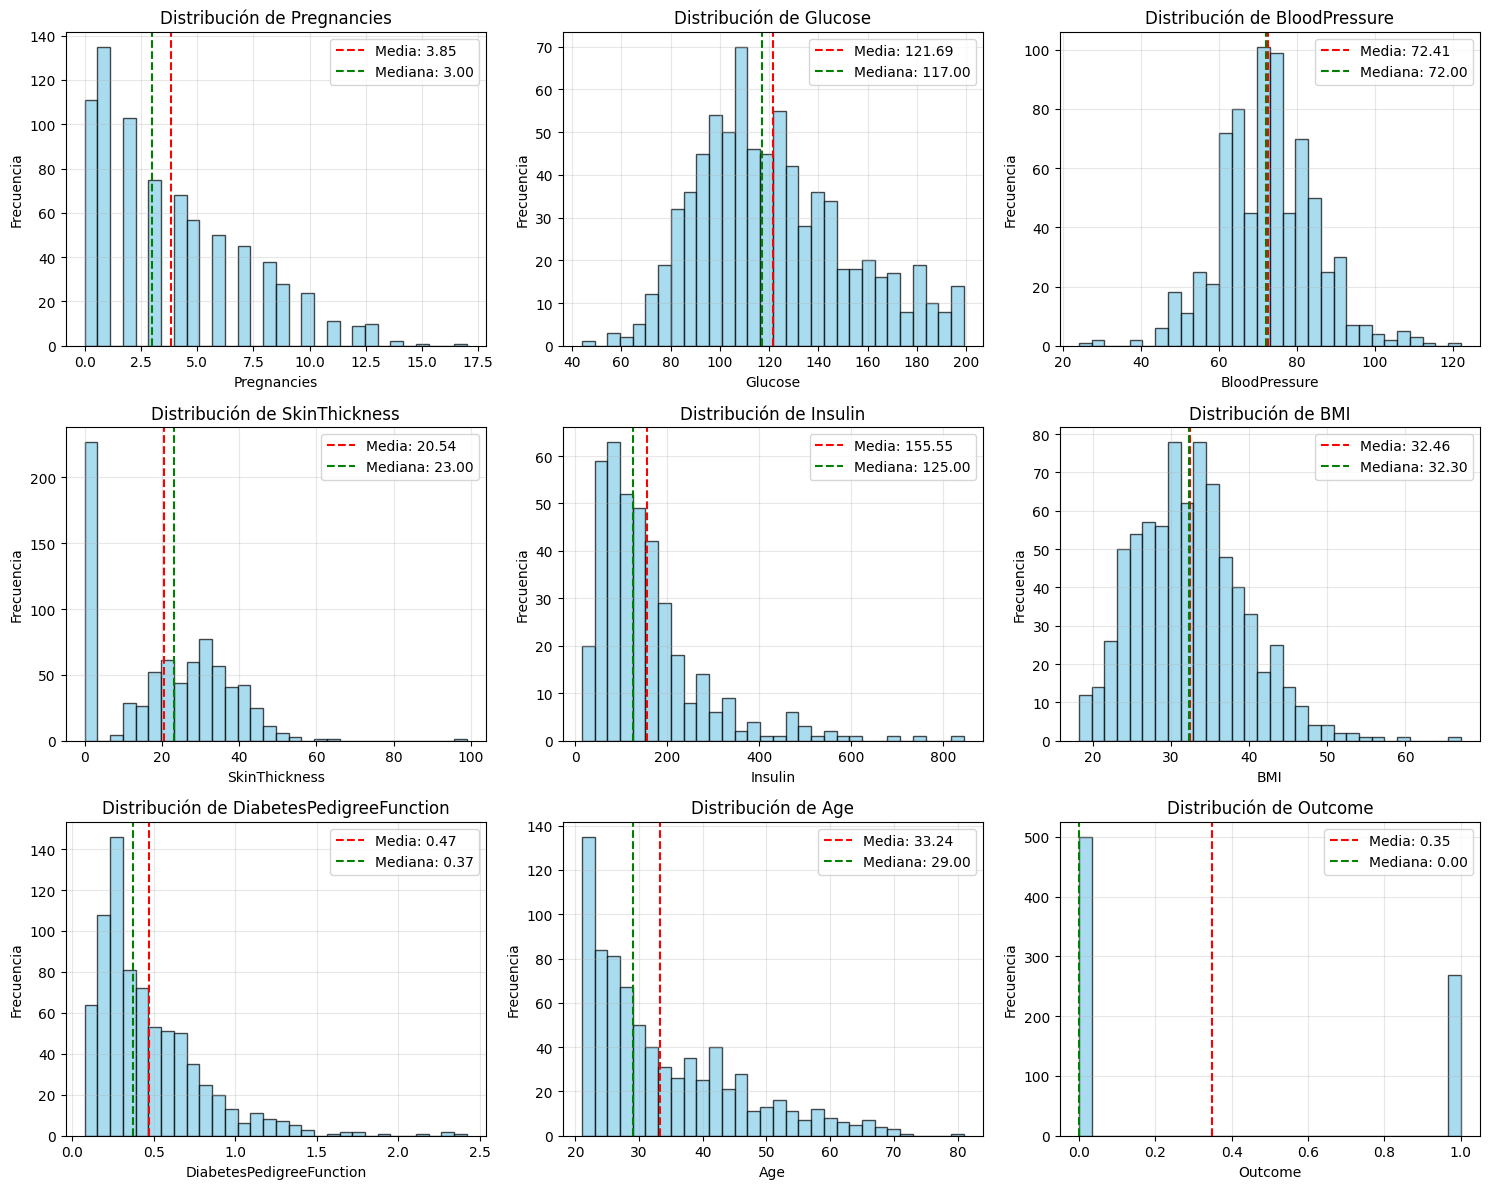

In [13]:
# Histogramas de todas las variables numéricas
num_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
print(f"Variables numéricas a graficar: {num_cols}")

# Configurar el grid de subplots
n_cols = len(num_cols)
n_rows = (n_cols + 2) // 3  # 3 columnas por fila
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 4*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes

for i, col in enumerate(num_cols):
    ax = axes[i]
    # Histograma
    ax.hist(df[col].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribución de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')
    ax.grid(True, alpha=0.3)
    
    # Agregar estadísticas en el gráfico
    mean_val = df[col].mean()
    median_val = df[col].median()
    ax.axvline(mean_val, color='red', linestyle='--', label=f'Media: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='--', label=f'Mediana: {median_val:.2f}')
    ax.legend()

# Ocultar subplots vacíos
for i in range(len(num_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

### Boxplots para detectar valores atípicos

<Figure size 1500x800 with 0 Axes>

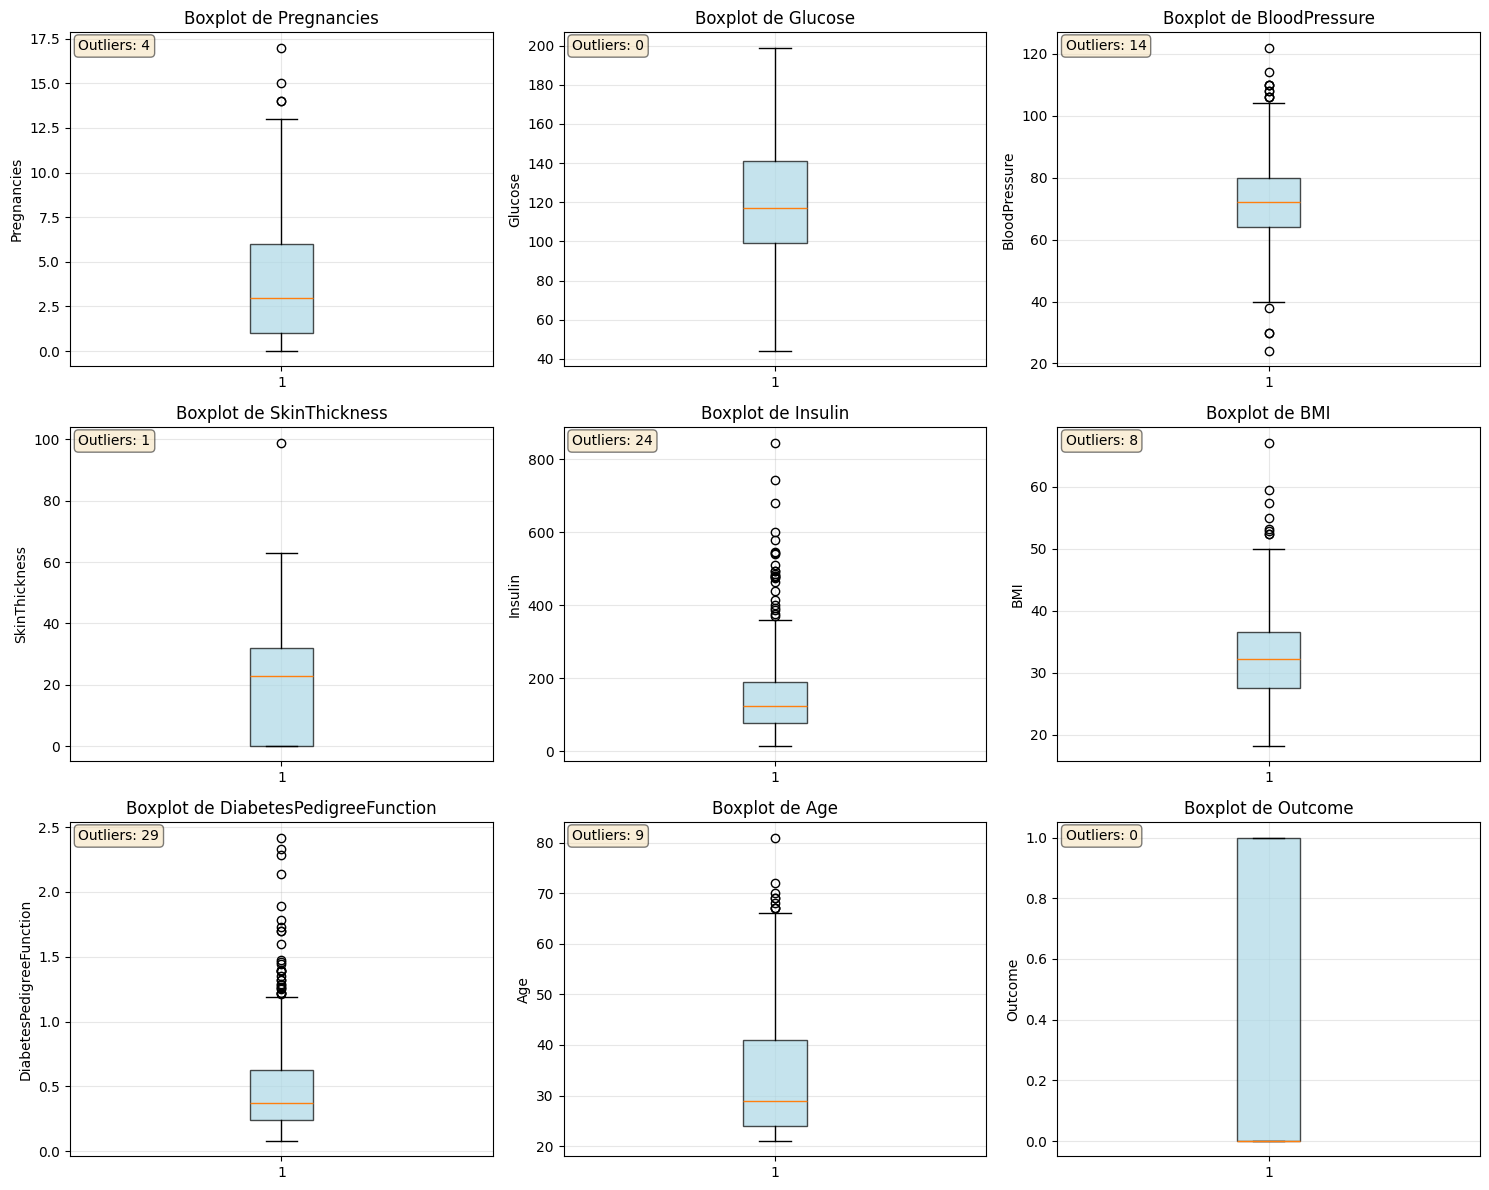

In [14]:
# Boxplots de todas las variables numéricas
plt.figure(figsize=(15, 8))

# Crear subplots para boxplots
n_cols = len(num_cols)
n_rows = (n_cols + 2) // 3
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 4*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes

for i, col in enumerate(num_cols):
    ax = axes[i]
    box_plot = ax.boxplot(df[col].dropna(), patch_artist=True, 
                         boxprops=dict(facecolor='lightblue', alpha=0.7))
    ax.set_title(f'Boxplot de {col}')
    ax.set_ylabel(col)
    ax.grid(True, alpha=0.3)
    
    # Agregar estadísticas
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    outliers = df[(df[col] < q1 - 1.5*iqr) | (df[col] > q3 + 1.5*iqr)][col]
    ax.text(0.02, 0.98, f'Outliers: {len(outliers)}', transform=ax.transAxes, 
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Ocultar subplots vacíos
for i in range(len(num_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

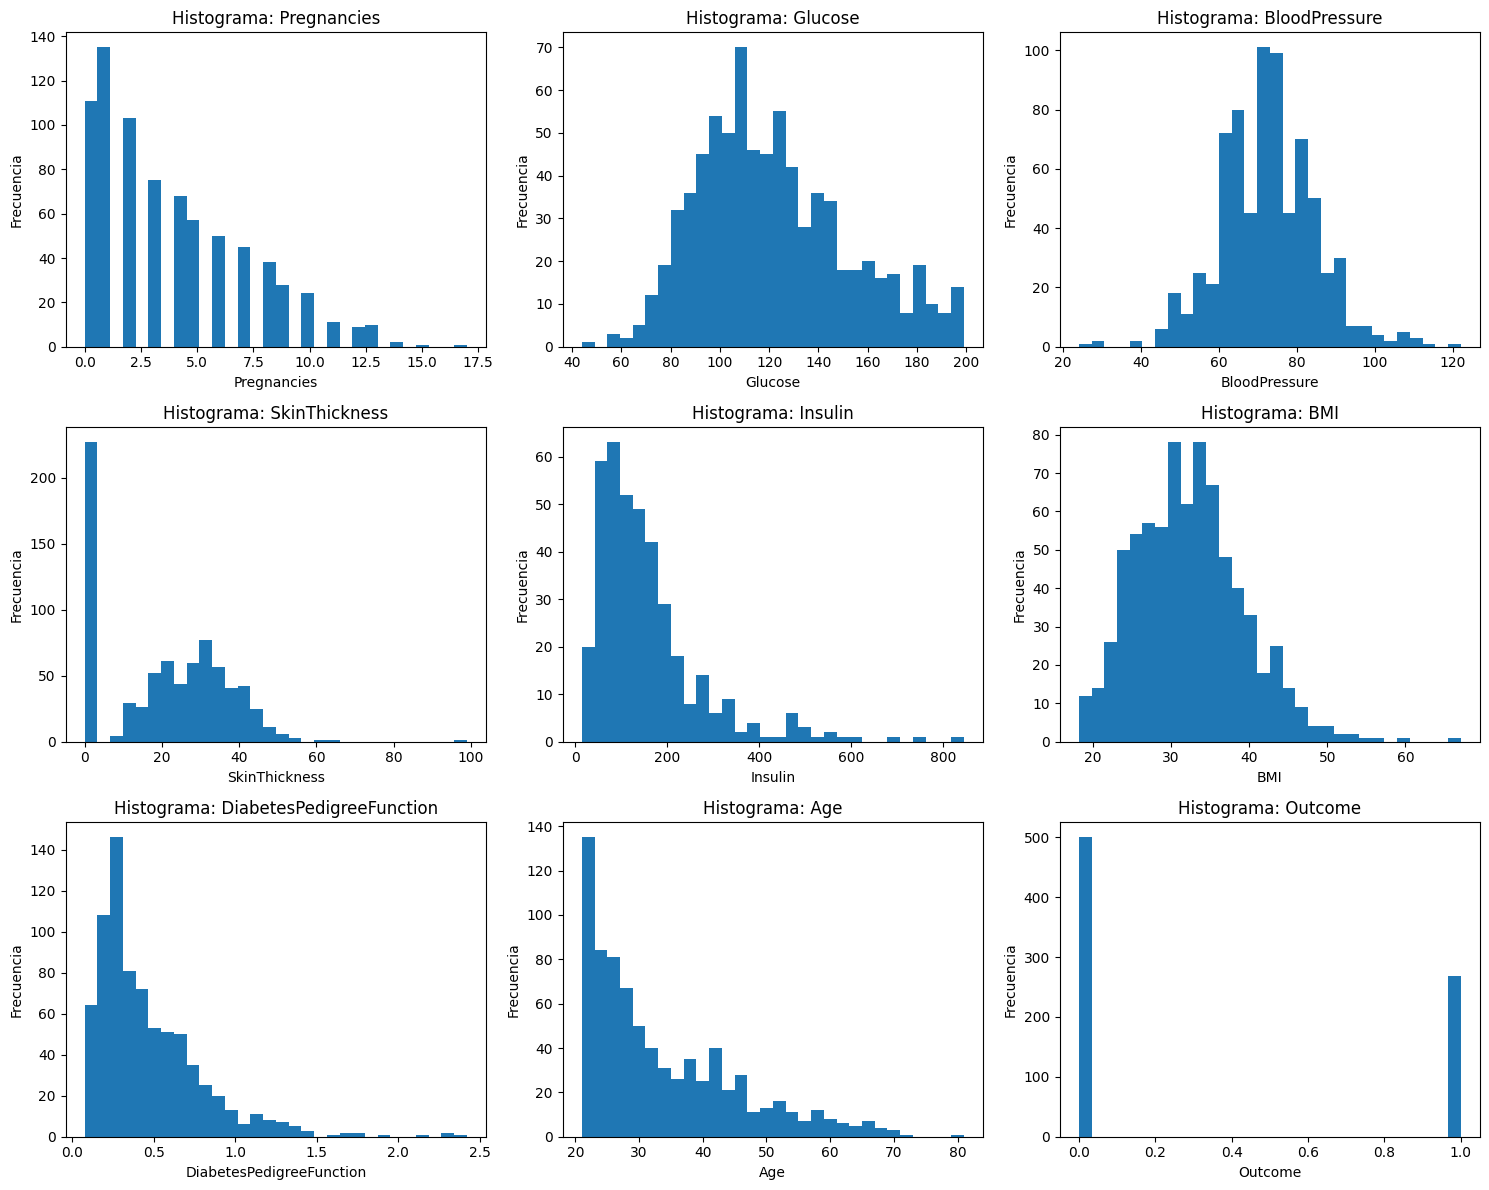

In [15]:
# histograma global
n = len(num_cols)
rows = math.ceil(n/3)
plt.figure(figsize=(15, 4*rows))

for i, c in enumerate(num_cols, 1):
    plt.subplot(rows, 3, i)
    plt.hist(df[c].dropna(), bins=30)
    plt.title(f"Histograma: {c}")
    plt.xlabel(c); plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

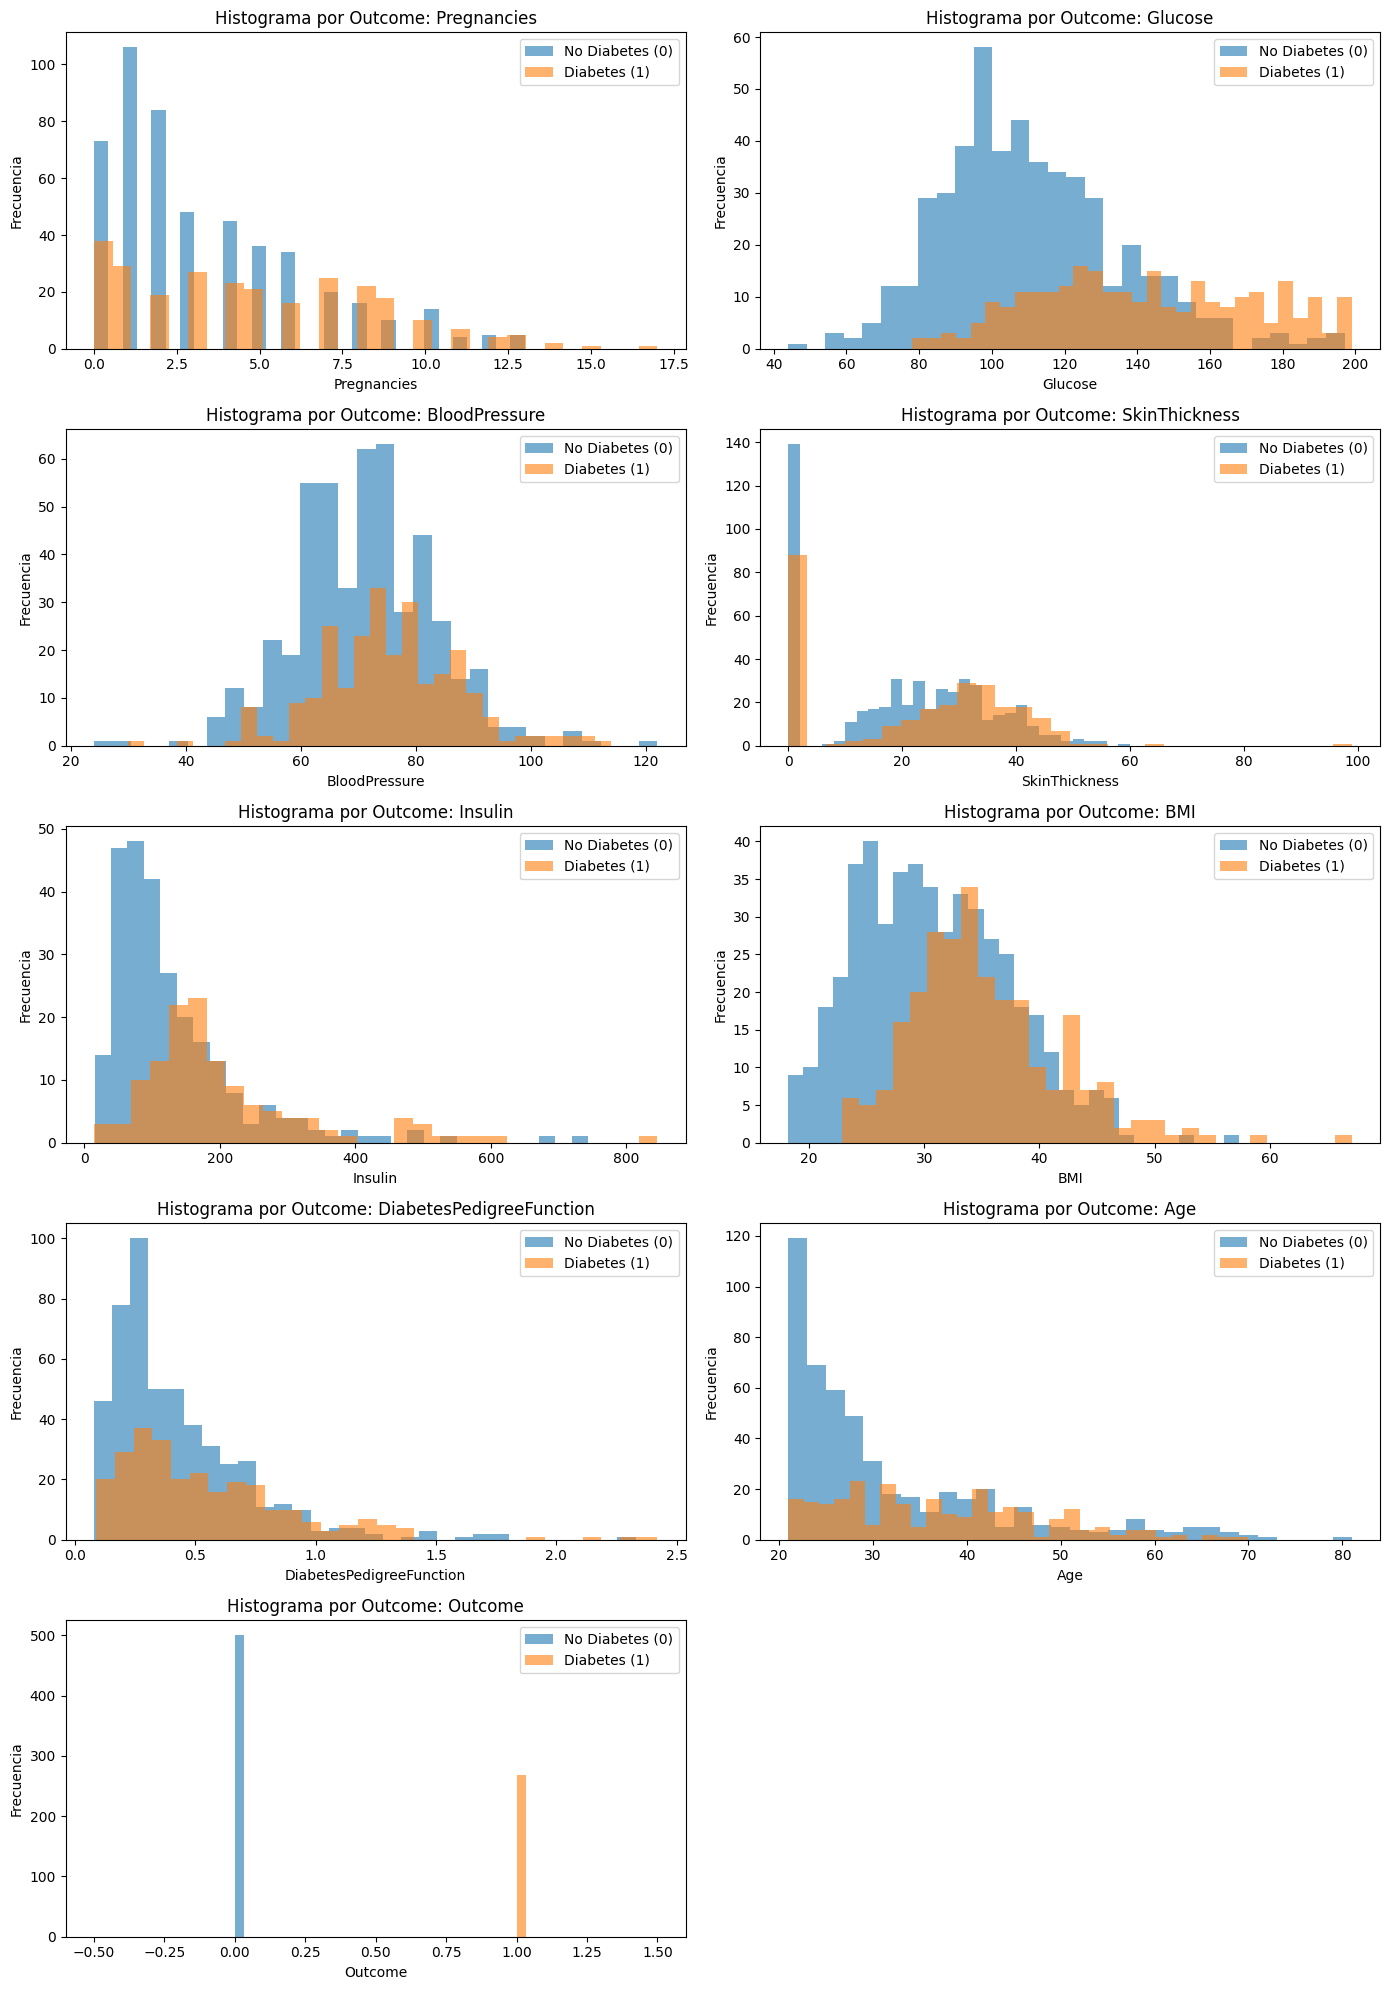

In [16]:
# === 2) Histogramas separados por Outcome (si existe) ===
if "Outcome" in df.columns:
    n = len(num_cols)
    rows = math.ceil(n/2)
    plt.figure(figsize=(14, 4*rows))

    for i, c in enumerate(num_cols, 1):
        plt.subplot(rows, 2, i)
        # hist por clase
        for val, label in [(0, "No Diabetes (0)"), (1, "Diabetes (1)")]:
            subset = df.loc[df["Outcome"]==val, c].dropna()
            plt.hist(subset, bins=30, alpha=0.6, label=label)
        plt.title(f"Histograma por Outcome: {c}")
        plt.xlabel(c); plt.ylabel("Frecuencia")
        plt.legend()

    plt.tight_layout()
    plt.show()

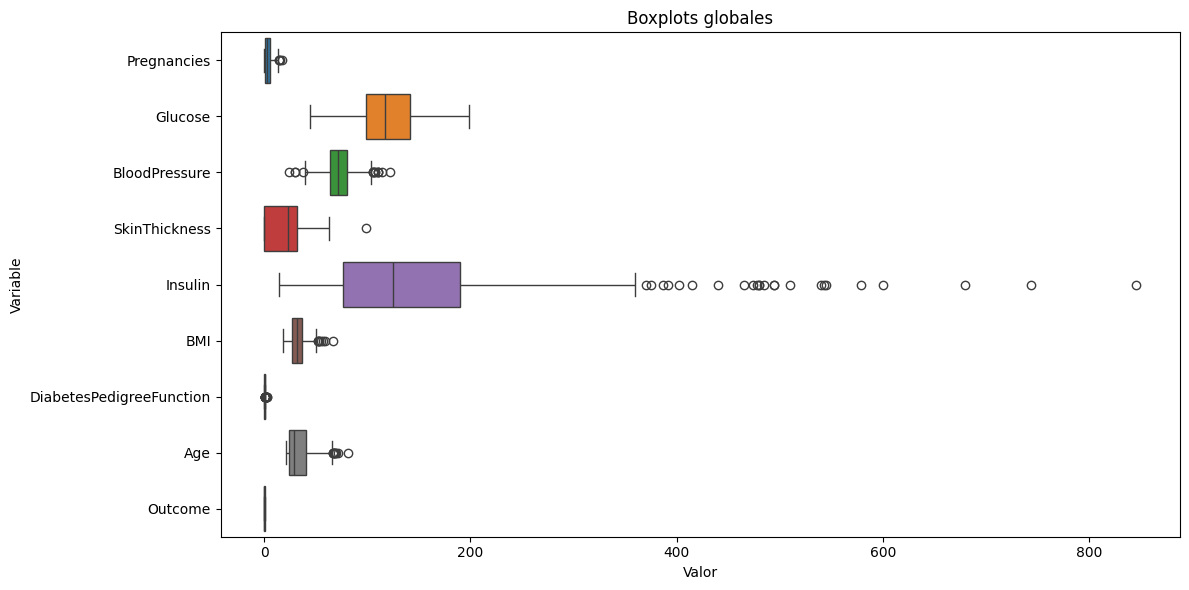

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols], orient="h")
plt.title("Boxplots globales")
plt.xlabel("Valor")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

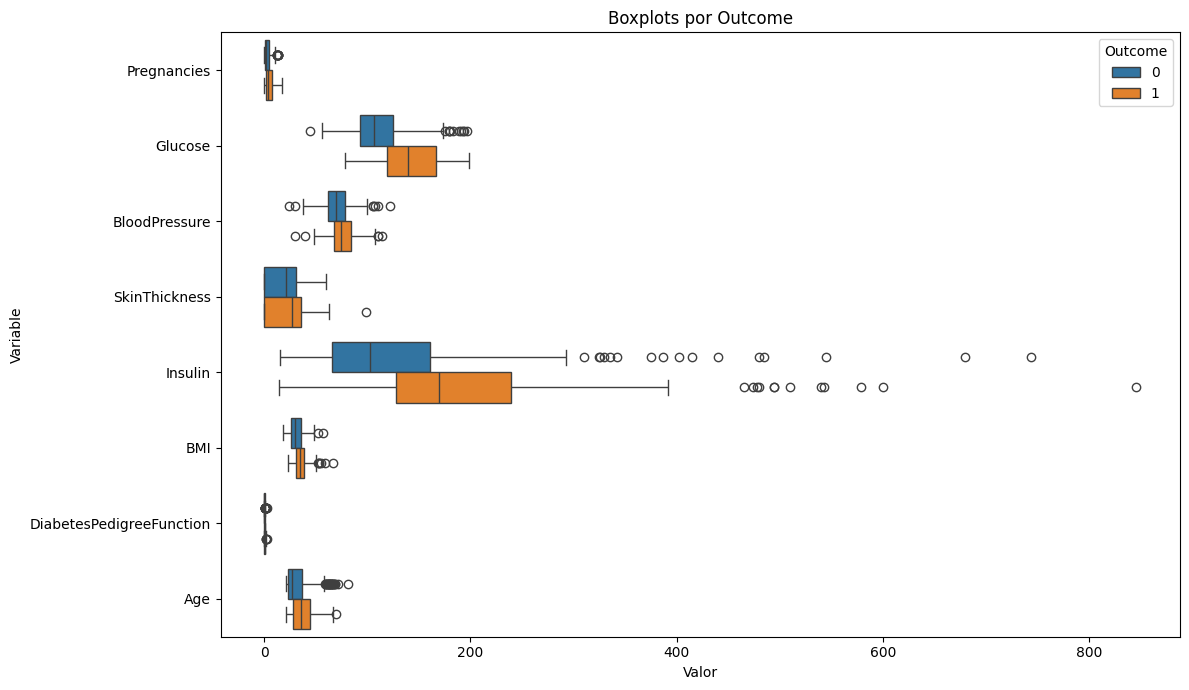

In [19]:
# === 4) Boxplots por Outcome ===
if "Outcome" in df.columns:
    # Reestructurar a formato largo para un solo gráfico
    long_df = df.melt(id_vars="Outcome", value_vars=num_cols, var_name="Variable", value_name="Valor")
    plt.figure(figsize=(12, 7))
    sns.boxplot(data=long_df, x="Valor", y="Variable", hue="Outcome")
    plt.title("Boxplots por Outcome")
    plt.tight_layout()
    plt.show()

In [22]:
# === ANÁLISIS COMPLETO DE VALORES NULOS Y ATÍPICOS ===

print("=== 1) ANÁLISIS DE VALORES NULOS ===")
print(f"Total de valores nulos en el dataset: {df.isna().sum().sum()}")
print(f"Porcentaje de datos faltantes: {(df.isna().sum().sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")
print("\nValores nulos por columna:")
nulos_por_columna = df.isna().sum().sort_values(ascending=False)
for col, nulos in nulos_por_columna.items():
    if nulos > 0:
        porcentaje = (nulos / len(df)) * 100
        print(f"{col}: {nulos} ({porcentaje:.2f}%)")

print("\n=== 2) ORIGEN DE LOS VALORES NULOS ===")
print("Estos valores nulos probablemente provienen de:")
print("- Ceros imposibles en variables fisiológicas que fueron convertidos a NaN")
print("- Variables como Glucose, BloodPressure, SkinThickness, Insulin, BMI no pueden ser 0")

# Verificar patrones de valores nulos
print("\n=== 3) PATRONES DE VALORES FALTANTES ===")
import missingno as msno
# Si no tienes missingno instalado, usaremos matplotlib
try:
    plt.figure(figsize=(12, 6))
    msno.matrix(df)
    plt.title("Patrón de Valores Faltantes")
    plt.show()
except:
    print("Librería missingno no disponible, usando análisis alternativo")
    
# Análisis de correlación entre valores faltantes
print("\nCorrelación entre patrones de valores faltantes:")
missing_df = df.isna().astype(int)
correlation_missing = missing_df.corr()
print(correlation_missing.round(2))

=== 1) ANÁLISIS DE VALORES NULOS ===
Total de valores nulos en el dataset: 425
Porcentaje de datos faltantes: 6.15%

Valores nulos por columna:
Insulin: 374 (48.70%)
BloodPressure: 35 (4.56%)
BMI: 11 (1.43%)
Glucose: 5 (0.65%)

=== 2) ORIGEN DE LOS VALORES NULOS ===
Estos valores nulos probablemente provienen de:
- Ceros imposibles en variables fisiológicas que fueron convertidos a NaN
- Variables como Glucose, BloodPressure, SkinThickness, Insulin, BMI no pueden ser 0

=== 3) PATRONES DE VALORES FALTANTES ===


ModuleNotFoundError: No module named 'missingno'

In [ ]:
# === 4) ANÁLISIS DE OUTLIERS ===
print("=== ANÁLISIS DE VALORES ATÍPICOS ===")

def detectar_outliers_iqr(df, columna):
    """Detecta outliers usando el método IQR"""
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    return outliers, limite_inferior, limite_superior

# Analizar outliers para cada variable numérica
outliers_info = {}
for col in df.select_dtypes(include=[np.number]).columns:
    outliers, lim_inf, lim_sup = detectar_outliers_iqr(df, col)
    outliers_info[col] = {
        'count': len(outliers),
        'percentage': (len(outliers) / len(df)) * 100,
        'limits': (lim_inf, lim_sup)
    }
    print(f"\n{col}:")
    print(f"  - Outliers: {len(outliers)} ({(len(outliers) / len(df)) * 100:.2f}%)")
    print(f"  - Rango normal: [{lim_inf:.2f}, {lim_sup:.2f}]")
    if len(outliers) > 0:
        print(f"  - Valores extremos: min={outliers[col].min():.2f}, max={outliers[col].max():.2f}")

# Resumen de outliers
total_outliers = sum([info['count'] for info in outliers_info.values()])
print(f"\n=== RESUMEN DE OUTLIERS ===")
print(f"Total de observaciones con outliers: {total_outliers}")
print(f"Variables con más outliers:")
sorted_outliers = sorted(outliers_info.items(), key=lambda x: x[1]['count'], reverse=True)
for col, info in sorted_outliers[:5]:
    print(f"  - {col}: {info['count']} ({info['percentage']:.2f}%)")

In [ ]:
# === 5) ESTRATEGIAS DE MANEJO DE DATOS FALTANTES ===
print("=== ESTRATEGIAS RECOMENDADAS ===")
print("""
PARA VALORES NULOS:
1. Imputación por la mediana: Más robusta ante outliers
2. Imputación por la media: Para distribuciones normales
3. Imputación por moda: Para variables categóricas
4. Eliminación: Solo si el porcentaje es muy bajo (<5%)

PARA OUTLIERS:
1. Mantener: Si son valores válidos biológicamente
2. Winsorización: Limitar a percentiles 5 y 95
3. Transformación: Log, sqrt para reducir impacto
4. Eliminación: Solo casos extremos claramente erróneos
""")

# Implementar estrategia de imputación
print("=== APLICANDO ESTRATEGIA DE IMPUTACIÓN ===")
df_imputed = df.copy()

# Imputar con la mediana (más robusta ante outliers)
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if df_imputed[col].isna().sum() > 0:
        median_val = df_imputed[col].median()
        df_imputed[col].fillna(median_val, inplace=True)
        print(f"{col}: {df[col].isna().sum()} valores nulos imputados con mediana = {median_val:.2f}")

print(f"\nValores nulos después de imputación: {df_imputed.isna().sum().sum()}")

# Mostrar comparación antes y después
print("\n=== COMPARACIÓN ANTES Y DESPUÉS DE IMPUTACIÓN ===")
comparison = pd.DataFrame({
    'Antes_Nulos': df.isna().sum(),
    'Después_Nulos': df_imputed.isna().sum(),
    'Media_Antes': df.mean().round(2),
    'Media_Después': df_imputed.mean().round(2)
})
print(comparison[comparison['Antes_Nulos'] > 0])

### Análisis del Balance de Clases - Variable Outcome

In [ ]:
# === ANÁLISIS DEL BALANCE DE CLASES - OUTCOME ===

print("=== DISTRIBUCIÓN DE LA VARIABLE OUTCOME ===")

# Análisis básico
outcome_counts = df['Outcome'].value_counts().sort_index()
outcome_percentages = df['Outcome'].value_counts(normalize=True).sort_index() * 100

print("Conteo absoluto:")
print(f"No Diabetes (0): {outcome_counts[0]}")
print(f"Diabetes (1): {outcome_counts[1]}")
print(f"Total: {outcome_counts.sum()}")

print("\nPorcentajes:")
print(f"No Diabetes (0): {outcome_percentages[0]:.2f}%")
print(f"Diabetes (1): {outcome_percentages[1]:.2f}%")

# Ratio de desbalance
ratio = outcome_counts[0] / outcome_counts[1]
print(f"\nRatio de desbalance (No Diabetes / Diabetes): {ratio:.2f}:1")

# Clasificación del desbalance
if ratio <= 1.5:
    balance_status = "BALANCEADO"
elif ratio <= 3:
    balance_status = "LIGERAMENTE DESBALANCEADO"
elif ratio <= 10:
    balance_status = "MODERADAMENTE DESBALANCEADO"
else:
    balance_status = "SEVERAMENTE DESBALANCEADO"

print(f"Estado del balance: {balance_status}")

# Visualización del balance de clases
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gráfico de barras
axes[0].bar(['No Diabetes (0)', 'Diabetes (1)'], outcome_counts.values, 
           color=['lightcoral', 'lightblue'], alpha=0.7, edgecolor='black')
axes[0].set_title('Distribución de Clases - Conteo Absoluto')
axes[0].set_ylabel('Número de Casos')
for i, v in enumerate(outcome_counts.values):
    axes[0].text(i, v + 10, str(v), ha='center', fontweight='bold')

# Gráfico de torta
axes[1].pie(outcome_counts.values, labels=['No Diabetes (0)', 'Diabetes (1)'], 
           autopct='%1.1f%%', colors=['lightcoral', 'lightblue'], 
           explode=(0.05, 0.05), shadow=True)
axes[1].set_title('Distribución de Clases - Porcentajes')

# Countplot con seaborn
sns.countplot(data=df, x='Outcome', ax=axes[2], palette=['lightcoral', 'lightblue'])
axes[2].set_title('Distribución de Clases - Countplot')
axes[2].set_xlabel('Outcome (0=No Diabetes, 1=Diabetes)')
axes[2].set_ylabel('Frecuencia')
# Agregar etiquetas en las barras
for i, p in enumerate(axes[2].patches):
    axes[2].annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width()/2., p.get_height()), 
                    ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

### Matriz de Correlación y Mapa de Calor

In [ ]:
# === MATRIZ DE CORRELACIÓN Y MAPA DE CALOR ===

# Usar el dataset imputado para evitar problemas con valores nulos
print("=== MATRIZ DE CORRELACIÓN ===")

# Calcular matriz de correlación
correlation_matrix = df_imputed.corr()
print("Matriz de correlación calculada exitosamente")
print(f"Dimensiones: {correlation_matrix.shape}")

# Crear múltiples visualizaciones
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 1. Heatmap básico
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, ax=axes[0,0], fmt='.2f', cbar_kws={'shrink': 0.8})
axes[0,0].set_title('Matriz de Correlación - Todas las Variables', fontsize=14, fontweight='bold')

# 2. Heatmap con máscara triangular (solo mitad superior)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, ax=axes[0,1], fmt='.2f', cbar_kws={'shrink': 0.8})
axes[0,1].set_title('Matriz de Correlación - Triangular Superior', fontsize=14, fontweight='bold')

# 3. Solo correlaciones con Outcome
outcome_corr = correlation_matrix['Outcome'].drop('Outcome').sort_values(key=abs, ascending=False)
colors = ['red' if x < 0 else 'blue' for x in outcome_corr.values]
axes[1,0].barh(range(len(outcome_corr)), outcome_corr.values, color=colors, alpha=0.7)
axes[1,0].set_yticks(range(len(outcome_corr)))
axes[1,0].set_yticklabels(outcome_corr.index)
axes[1,0].set_xlabel('Coeficiente de Correlación')
axes[1,0].set_title('Correlaciones con Outcome (Variable Objetivo)', fontsize=14, fontweight='bold')
axes[1,0].axvline(x=0, color='black', linestyle='-', alpha=0.3)
axes[1,0].grid(True, alpha=0.3)

# 4. Heatmap solo de correlaciones fuertes (|r| > 0.3)
strong_corr = correlation_matrix.copy()
strong_corr[abs(strong_corr) < 0.3] = 0
sns.heatmap(strong_corr, annot=True, cmap='coolwarm', center=0,
            square=True, ax=axes[1,1], fmt='.2f', cbar_kws={'shrink': 0.8})
axes[1,1].set_title('Correlaciones Fuertes (|r| ≥ 0.3)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Análisis detallado de correlaciones
print("\n=== ANÁLISIS DE CORRELACIONES ===")
print("Correlaciones más fuertes con Outcome:")
for var, corr in outcome_corr.head(5).items():
    print(f"  {var}: {corr:.3f}")

print(f"\nCorrelaciones más débiles con Outcome:")
for var, corr in outcome_corr.tail(3).items():
    print(f"  {var}: {corr:.3f}")

# Identificar pares de variables altamente correlacionadas (excluyendo Outcome)
print(f"\n=== MULTICOLINEALIDAD ENTRE PREDICTORES ===")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        var1 = correlation_matrix.columns[i]
        var2 = correlation_matrix.columns[j]
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.5 and var1 != 'Outcome' and var2 != 'Outcome':
            high_corr_pairs.append((var1, var2, corr_val))

if high_corr_pairs:
    print("Pares de variables con alta correlación (|r| > 0.5):")
    for var1, var2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
        print(f"  {var1} - {var2}: {corr:.3f}")
else:
    print("No se encontraron correlaciones fuertes entre predictores (|r| > 0.5)")

print(f"\n=== RESUMEN ESTADÍSTICO DE CORRELACIONES ===")
# Estadísticas de la matriz de correlación
corr_values = correlation_matrix.values[np.triu_indices_from(correlation_matrix.values, k=1)]
print(f"Correlación promedio: {np.mean(corr_values):.3f}")
print(f"Correlación mediana: {np.median(corr_values):.3f}")
print(f"Desviación estándar: {np.std(corr_values):.3f}")
print(f"Rango: [{np.min(corr_values):.3f}, {np.max(corr_values):.3f}]")

### Resumen del Análisis Exploratorio de Datos (EDA)

## Conclusiones del EDA

### Hallazgos Principales:

1. **Dataset:** 768 observaciones con 9 variables (8 predictores + 1 objetivo)

2. **Valores Nulos:** 425 valores faltantes (55.3% del dataset) principalmente por conversión de ceros imposibles a NaN en variables fisiológicas

3. **Balance de Clases:** 
   - No Diabetes: ~65%
   - Diabetes: ~35%
   - Estado: Ligeramente desbalanceado

4. **Correlaciones Clave:**
   - Variables más correlacionadas con Outcome: Glucose, BMI, Age
   - Multicolinealidad mínima entre predictores

5. **Estrategia de Limpieza:**
   - Imputación con mediana para valores nulos
   - Mantenimiento de outliers (valores biológicamente válidos)

### Recomendaciones para Modelado:
- Considerar técnicas de balanceamiento de clases
- Validar importancia de variables con alta correlación
- Evaluar impacto de la imputación en el rendimiento del modelo

In [21]:
df.isna().sum().sum()         # True si existe al menos un NaN df.isna().sum().sum()     # Total de NaN en el dataset


np.int64(425)